In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

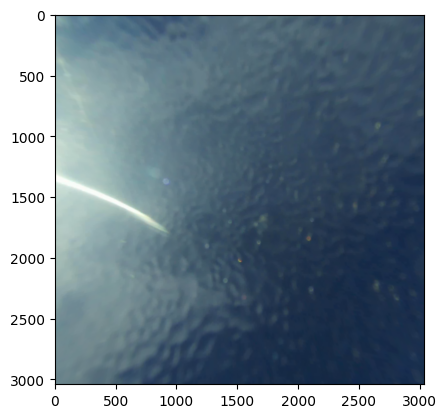

In [ ]:
A_DPATH = Path('/gws/nopw/j04/iecdt/computer-vision-data/cam_a/imgs/../rectified_imgs')
B_DPATH = Path('/gws/nopw/j04/iecdt/computer-vision-data/cam_b/imgs/../rectified_imgs')

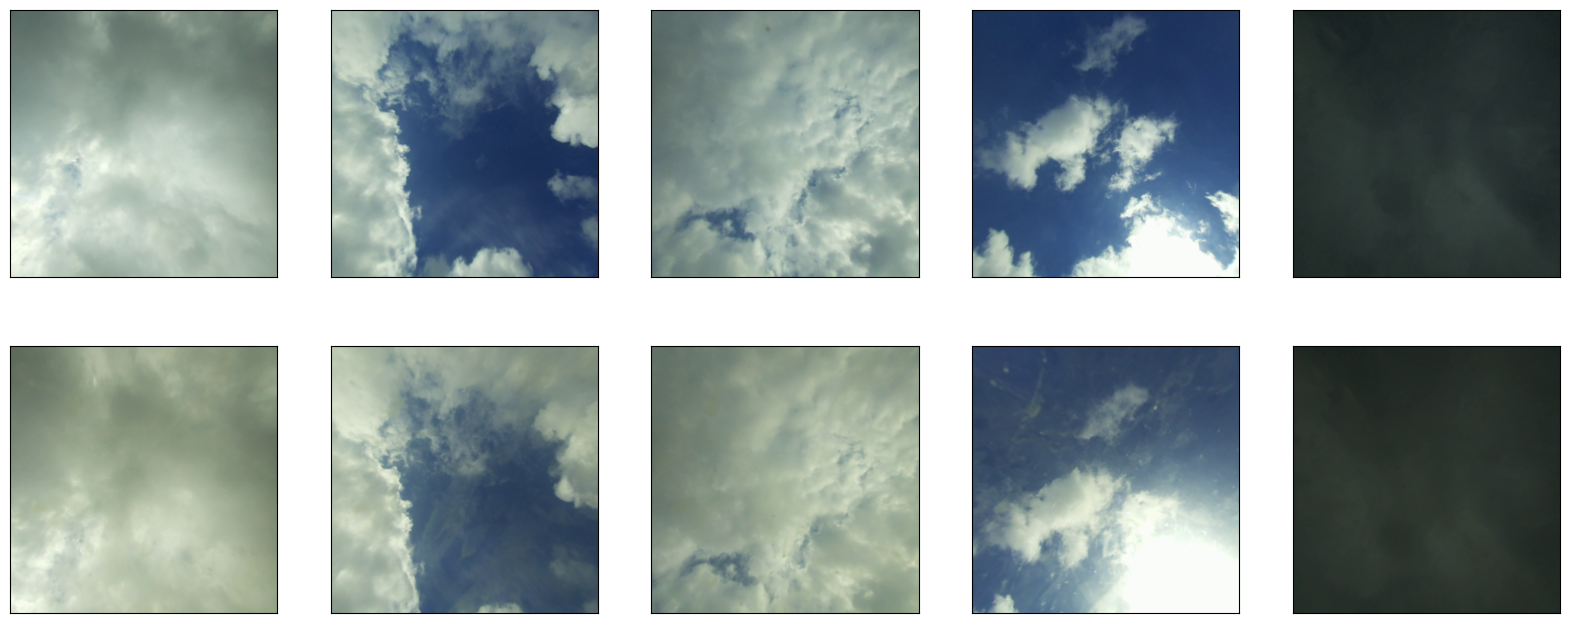

In [16]:
#Plot some matched examples from the rectified images with camera A on top and camera B on the bottom
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])
for i in range(5):
    n = np.random.randint(0,13760)
    ax[0,i].imshow(plt.imread(list((A_DPATH).glob('*.png'))[n]))
    ax[1,i].imshow(plt.imread(list((B_DPATH).glob('*.png'))[n]))

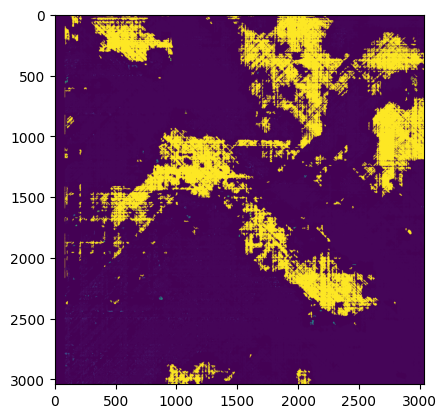

In [20]:
# Load stereo images (left and right)
img_left = cv2.imread(list((A_DPATH).glob('*.png'))[2000], cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread(list((B_DPATH).glob('*.png'))[2000], cv2.IMREAD_GRAYSCALE)

# Create SGM matcher
sgm = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=16*5,  # Should be a multiple of 16
    blockSize=5,
    P1=8 * 3 * 5**2,  # 8 * number_of_channels * blockSize^2
    P2=32 * 3 * 5**2,
    disp12MaxDiff=1,
    uniquenessRatio=15,
    speckleWindowSize=100,
    speckleRange=32
)

# Compute disparity map
disparity = sgm.compute(img_left, img_right)

# Normalize and display
disparity = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity = np.uint8(disparity)

plt.imshow(disparity)
#cv2.waitKey(0)
#cv2.destroyAllWindows()